In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

### Multivariate linear regression

In [19]:
import pandas as pd

In [52]:
# In this section, multivariate linear regression is used to predic the Brazilian inflation based on
# many observed variables, see https://github.com/gabrielrvsc/HDeconometrics/
df = pd.read_csv('./BRinf')
df.head()

,Unnamed: 0,Brazil CPI IPCA MoM,FGV Brazil General Prices IGP-,FGV Brazil General Prices IGP-.1,FGV Brazil General Prices IGP-.2,FGV Brazil General Prices IGP-.3,Brazil CPI IPCA Median Market,Brazil Total Electricity Consu,Brazil Industrial Electricity,BofA Merrill Lynch Economic Co,...,X5t.12,X5t.13,fmed2,fmean,fmean2,fdp,lfmed2,lfmean,lfmean2,lfdp
0,2003-01-31,2.25,2.33,2.17,5.816,2.29,11.56,25422.0,-359,-1.47,...,0.80,0.68,4.0000,1.96,3.8416,0.18,1.3225,1.15,1.3225,0.24
1,2003-02-28,1.57,2.28,1.59,4.351,2.42,10.95,25163.0,-303,-1.21,...,0.68,0.48,2.5600,1.60,2.5600,0.26,0.7569,0.91,0.8281,0.27
2,2003-03-31,1.23,1.53,1.66,4.593,1.58,9.58,24960.0,115,-0.35,...,0.55,0.50,0.8836,0.93,0.8649,0.13,0.4900,0.73,0.5329,0.17
3,2003-04-30,0.97,0.92,0.41,1.173,1.24,8.88,25284.0,93,-0.15,...,0.45,0.78,1.0000,0.97,0.9409,0.14,0.2500,0.52,0.2704,0.18
4,2003-05-31,0.61,-0.26,-0.67,-1.860,0.02,8.22,24785.0,285,-0.47,...,0.60,0.43,0.2500,0.50,0.2500,0.10,0.3025,0.55,0.3025,0.15


In [21]:
# number of observations, number of variables
df.shape

(156, 93)

In [22]:
nb_data_train = 140
nb_diff       = df.shape[0]-nb_data_train
# inflation observations
Y_train = df.iloc[0:nb_data_train,1] 
Y_test  = df.iloc[-nb_diff:,1] 
Y_test.head()

140    0.57
141    0.42
142    0.51
143    0.78
144    1.24
Name: Brazil CPI IPCA MoM, dtype: float64

In [23]:
# other variables
X_train = df.iloc[0:nb_data_train,2:] 
X_test  = df.iloc[-nb_diff:,2:] 
X_test.head()

,FGV Brazil General Prices IGP-,FGV Brazil General Prices IGP-.1,FGV Brazil General Prices IGP-.2,FGV Brazil General Prices IGP-.3,Brazil CPI IPCA Median Market,Brazil Total Electricity Consu,Brazil Industrial Electricity,BofA Merrill Lynch Economic Co,CNI Brazil Manufacture Industr,CNI Brazil Manufacture Industr.1,...,X5t.12,X5t.13,fmed2,fmean,fmean2,fdp,lfmed2,lfmean,lfmean2,lfdp
140,0.20,0.02,0.110,0.31,6.34,38551.0,580,-0.22,-0.1,81.8,...,0.35,0.41,0.1849,0.43,0.1849,0.04,0.2500,0.49,0.2401,0.05
141,0.28,0.59,3.158,0.02,6.38,38798.0,-266,-0.63,0.3,82.3,...,0.40,0.53,0.2500,0.50,0.2500,0.04,0.3249,0.58,0.3364,0.05
142,0.98,1.14,6.098,0.82,6.57,40100.0,61,-0.76,-0.6,82.6,...,0.52,0.64,0.3025,0.59,0.3481,0.05,0.5476,0.72,0.5184,0.08
143,0.62,0.38,2.089,0.98,6.67,40950.0,327,-1.48,-0.1,82.0,...,0.64,0.71,0.4900,0.75,0.5625,0.05,0.9409,0.97,0.9409,0.12
144,0.76,0.67,3.672,0.42,7.01,39673.0,-773,-0.82,-0.2,78.6,...,0.72,0.69,1.9600,1.18,1.3924,0.11,1.0201,0.99,0.9801,0.16


In [53]:
from sklearn import linear_model
reg_lin = linear_model.Ridge(alpha= 0.0)

In [54]:
reg_lin.fit(X_train, Y_train)

Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [55]:
y_hat_lin = reg_lin.predict(X_train)

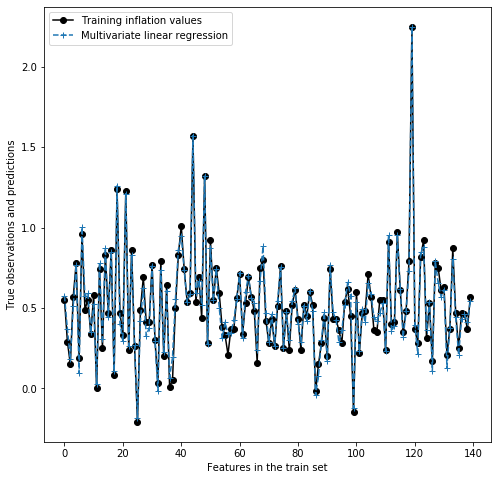

In [56]:
plt.figure(1,figsize=(8,8))
plt.xlabel("Features in the train set")
plt.ylabel('True observations and predictions')
plt.plot(Y_train.values,marker='o',color='k')
plt.plot(y_hat_lin,'o--',marker='+')
plt.legend(labels=('Training inflation values','Multivariate linear regression'))

In [57]:
y_hat_lin = reg_lin.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
mean_squared_error(y_hat_lin,Y_test.values)

0.009879429334554846

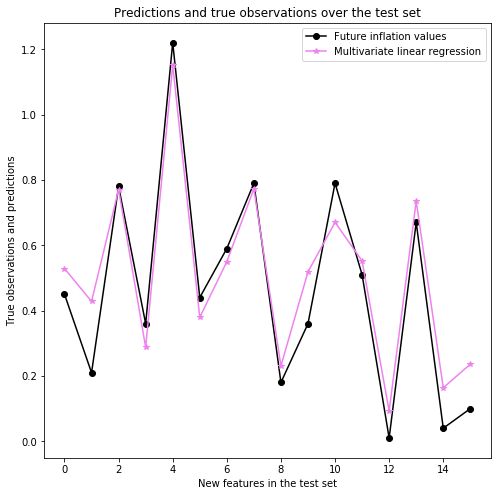

In [60]:
plt.figure(1,figsize=(8,8))
plt.title("Predictions and true observations over the test set")
plt.xlabel("New features in the test set")
plt.ylabel('True observations and predictions')
plt.plot(Y_test.values,marker='o',color='k')
plt.plot(y_hat_lin,marker='*',color='violet')
plt.legend(labels=('Future inflation values','Multivariate linear regression'))

### Train test split

In [61]:
from sklearn.model_selection import train_test_split

In [70]:
mse_train = []
mse_test = []
for iteration in range(50):
    train, test = train_test_split(df, test_size=0.1)
    X_train = train.iloc[:,2:20] 
    X_test = test.iloc[:,2:20] 
    Y_train  = train.iloc[:,1] 
    Y_test  = test.iloc[:,1] 
    reg_lin = linear_model.Ridge(alpha= 0.0)
    reg_lin.fit(X_train, Y_train)
    y_hat_lin = reg_lin.predict(X_test)
    mse_test = np.append(mse_test,mean_squared_error(y_hat_lin,Y_test.values))
    y_hat_lin = reg_lin.predict(X_train)
    mse_train = np.append(mse_train,mean_squared_error(y_hat_lin,Y_train.values))

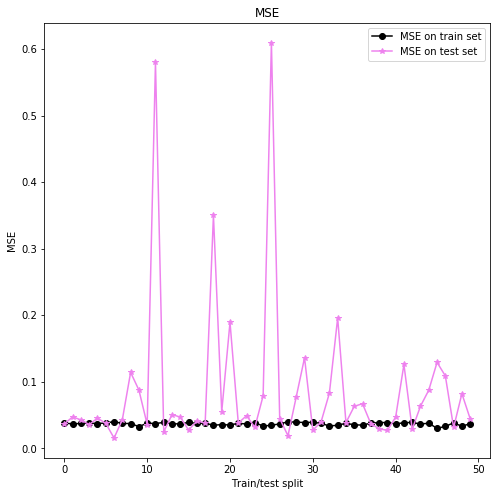

In [71]:
plt.figure(1,figsize=(8,8))
plt.title("MSE")
plt.xlabel("Train/test split")
plt.ylabel('MSE')
plt.plot(mse_train,marker='o',color='k')
plt.plot(mse_test,marker='*',color='violet')
plt.legend(labels=('MSE on train set','MSE on test set'))